# Preprocesamiento de datos

- Análisis de ciencias de datos
- Profesores:
  - Rubí Isabela Gutiérrez López
  - Daniel Otero Fadul
- Juan Pablo Echeagaray González
- 4 de marzo del 2022

### Dependencias

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

print(f'''
# de versiones
Python: {sys.version}
pandas: {pd.__version__}
numpy: {np.__version__}
matplotlib: {mpl.__version__}
seaborn: {sns.__version__}
''')



# de versiones
Python: 3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
pandas: 1.1.4
numpy: 1.22.2
matplotlib: 3.4.1
seaborn: 0.11.1



## Lectura de datos

In [3]:
df1 = pd.read_csv('Cars1.csv')
df2 = pd.read_csv('Cars2.csv')


## Preprocesamiento de datos

In [4]:
df1.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,data1,data2
0,18.0,8,307,130,3504,12,70,1,chevrolet chevelle malibu,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN
2,18.0,8,318,150,3436,11,70,1,plymouth satellite,NaN,NaN
3,16.0,8,304,150,3433,12,70,1,amc rebel sst,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN


In [5]:
df2.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,33.0,4,91,53,1795,17.4,76,3,honda civic
1,20.0,6,225,100,3651,17.7,76,1,dodge aspen se
2,18.0,6,250,78,3574,21,76,1,ford granada ghia
3,18.5,6,250,110,3645,16.2,76,1,pontiac ventura sj
4,17.5,6,258,95,3193,17.8,76,1,amc pacer d/l


In [6]:
df1.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car', 'data1', 'data2'],
      dtype='object')

In [7]:
df2.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car'],
      dtype='object')

### Unión de las bases de datos

Como ya sabemos que las bases de datos tienen las mismas columnas, podemos hacer uso de la función `pd.concat()` para hacer un _stack_ de las bases de datos. El que el primer dataframe tenga 2 columnas extra no afectará este proceso, `pandas` en automático insetará valores `NaN` para las observaciones agregadas.

In [8]:
df_join = pd.concat([df1, df2])
df_join


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,data1,data2
0,18.0,8,307,130,3504,12,70,1,chevrolet chevelle malibu,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN
2,18.0,8,318,150,3436,11,70,1,plymouth satellite,NaN,NaN
3,16.0,8,304,150,3433,12,70,1,amc rebel sst,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl,NaN,NaN
196,44.0,4,97,52,2130,24.6,82,2,vw pickup,NaN,NaN
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage,NaN,NaN
198,28.0,4,120,79,2625,18.6,82,1,ford ranger,NaN,NaN


In [9]:
df_join[['car', 'model', 'weight']].value_counts()


car                        model  weight
vw rabbit custom           79     1925      1
datsun 710                 75     2545      1
datsun 810 maxima          81     2930      1
datsun b-210               76     1990      1
datsun b210                74     1950      1
                                           ..
oldsmobile omega           73     3664      1
oldsmobile omega brougham  79     2700      1
oldsmobile starfire sx     78     2855      1
oldsmobile vista cruiser   73     4499      1
amc ambassador brougham    73     3821      1
Length: 398, dtype: int64

### Remover columnas con valores NaN

Para remover columnas con un cierto número de valores NaN hacemos uso de la función `dropna()`, hacemos esto en favor de eliminar manualmente las columnas con el fin de automatizar este proceso.

In [10]:
# Checar primero cuáles son las columnas, ya sabemos que son las últimas 2, pero es mejor automatizar este proceso
this_thresh = 1
df_join.dropna(axis=1, thresh=this_thresh * df_join.shape[0], inplace=True)


In [11]:
df_join.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car'],
      dtype='object')

### Limpieza de datos

Como dice el enunciado de la tarea, hay algunas columnas con valores nulos que fueron representados por el caracter `?`. Para remplazar estos valores primero hemos de hacer una búsqueda en todas las columnas por el mismo. El concatenado de las funciones `isin()` y `.any()` revelará en qué columnas se encuentra este valor.

In [12]:
df_join.isin(['?']).any()


mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration     True
model           False
origin          False
car             False
dtype: bool

Antes de seguir avanzando sería una buena idea verificar con qué tipo de datos estamos trabajando. Hasta el momento no hemos hecho alguna operación matemática, pero ciertamente estas pueden fallar si es que hay valores nulos o `str` en las columnas.

In [13]:
df_join.dtypes


mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration     object
model             int64
origin            int64
car              object
dtype: object

In [14]:
df_join['horsepower'].replace('?', np.nan, inplace=True)
df_join['acceleration'].replace('?', np.nan, inplace=True)


El valor que hemos escogido para remplazar esos valores es la mediana, para calcularla, primero hemos de convertir el tipo de datos de las columnas `horsepower`  y `acceleration` a `float`.

In [15]:
df_join['horsepower']= df_join['horsepower'].astype(float)
df_join['acceleration'] = df_join['acceleration'].astype(float)


In [16]:
hp_median = df_join['horsepower'].median()
acc_median = df_join['acceleration'].median()


In [17]:
df_join['horsepower'].fillna(hp_median, inplace=True)
df_join['acceleration'].fillna(acc_median, inplace=True)


### Descripción de los datos

In [18]:
df_join.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.427136,104.266332,2970.424623,15.549497,76.010050,1.572864
std,7.815984,1.701004,104.268683,38.225361,846.841774,2.731897,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.000000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


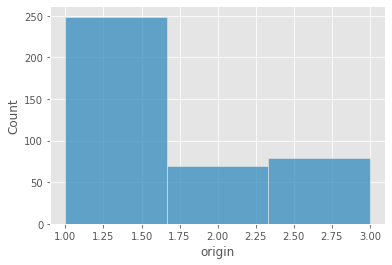

In [36]:
ax = sns.histplot(df_join.origin, bins=3)


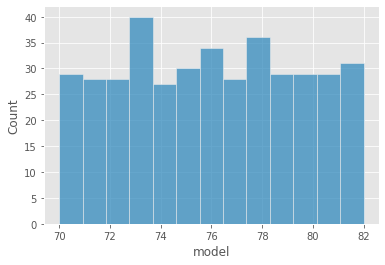

In [31]:
ax = sns.histplot(df_join.model, bins=13)
